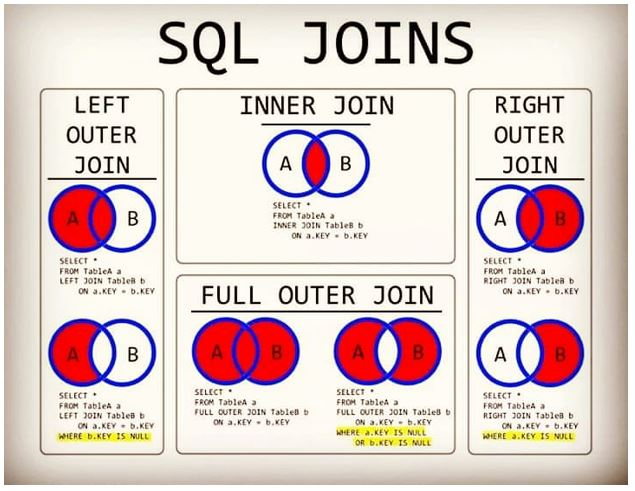

In [11]:

from IPython.display import Image
Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/sql_joins.jpg', width=800)


In [ ]:

DROP TABLE Department
CREATE TABLE [Department]( 
   [DepartmentID] [int] NOT NULL, 
   [Name] VARCHAR(250) NOT NULL, 
) ON [PRIMARY] 

INSERT [Department] ([DepartmentID], [Name])  
VALUES (1, N'Engineering') 
INSERT [Department] ([DepartmentID], [Name])  
VALUES (2, N'Administration') 
INSERT [Department] ([DepartmentID], [Name])  
VALUES (3, N'Sales') 
INSERT [Department] ([DepartmentID], [Name])  
VALUES (4, N'Marketing') 
INSERT [Department] ([DepartmentID], [Name])  
VALUES (5, N'Finance') 
GO 

DROP TABLE Employee
CREATE TABLE [Employee]( 
   [EmployeeID] [int] NOT NULL, 
   [FirstName] VARCHAR(250) NOT NULL, 
   [LastName] VARCHAR(250) NOT NULL, 
   [DepartmentID] [int] NOT NULL, 
) ON [PRIMARY] 
GO
 
INSERT [Employee] ([EmployeeID], [FirstName], [LastName], [DepartmentID]) 
VALUES (1, N'Orlando', N'Gee', 1 ) 
INSERT [Employee] ([EmployeeID], [FirstName], [LastName], [DepartmentID]) 
VALUES (2, N'Keith', N'Harris', 2 ) 
INSERT [Employee] ([EmployeeID], [FirstName], [LastName], [DepartmentID]) 
VALUES (3, N'Donna', N'Carreras', 3 ) 
INSERT [Employee] ([EmployeeID], [FirstName], [LastName], [DepartmentID]) 
VALUES (4, N'Janet', N'Gates', 3 ) 
INSERT [Employee] ([EmployeeID], [FirstName], [LastName], [DepartmentID]) 
VALUES (6, N'Jane', N'Short', 6 ) 


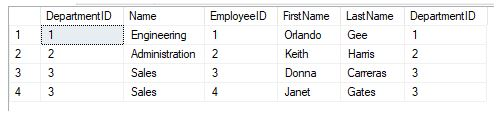

In [8]:

-- Inner Join; shows only matching records in both tables
SELECT * FROM Department D 
INNER JOIN Employee E ON D.DepartmentID = E.DepartmentID 
GO 

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/inner_join.jpg', width=600)


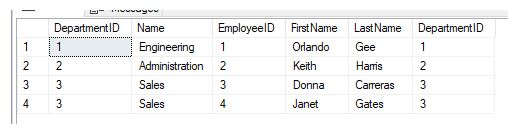

In [12]:

-- essentially this is an Inner Join, but CROSS APPLY works better on things that have no simple JOIN condition
SELECT * FROM Department D 
CROSS APPLY 
   ( 
   SELECT * FROM Employee E 
   WHERE E.DepartmentID = D.DepartmentID 
   ) A 
GO

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/cross_apply.jpg', width=600)


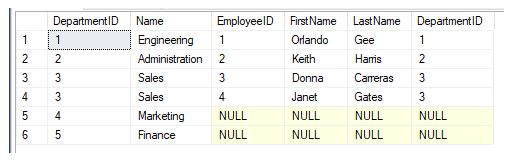

In [13]:

-- shows everything in the left table and all matches in the right table
SELECT * FROM Department D 
Left JOIN Employee E ON D.DepartmentID = E.DepartmentID 
GO 

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/left_join.jpg', width=600)


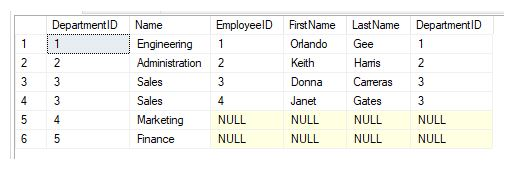

In [14]:

-- essentially, this is a Left Join
SELECT * FROM Department D 
OUTER APPLY 
   ( 
   SELECT * FROM Employee E 
   WHERE E.DepartmentID = D.DepartmentID 
   ) A 
GO

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/outer_apply.jpg', width=600)


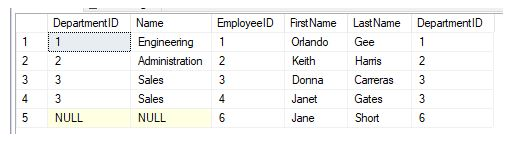

In [15]:

-- shows everything in the right table and all matches from the left table
SELECT * FROM Department D 
Right JOIN Employee E ON D.DepartmentID = E.DepartmentID 
GO 

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/right_join.jpg', width=600)


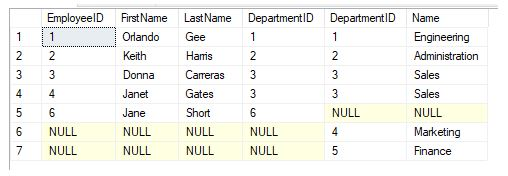

In [16]:

-- two tables will be matched, based on the ON clause
-- The results of a FULL OUTER JOIN will include at least one row from Table A and at least one row from Table B 
-- and even when the JOIN conditions are not satisfied. In this case a row of NULL values will come from the row 
-- that doesn’t match.

SELECT *
FROM Employee E
Full Outer JOIN Department D
ON E.DepartmentID = D.DepartmentID

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/outer_join.jpg', width=600)


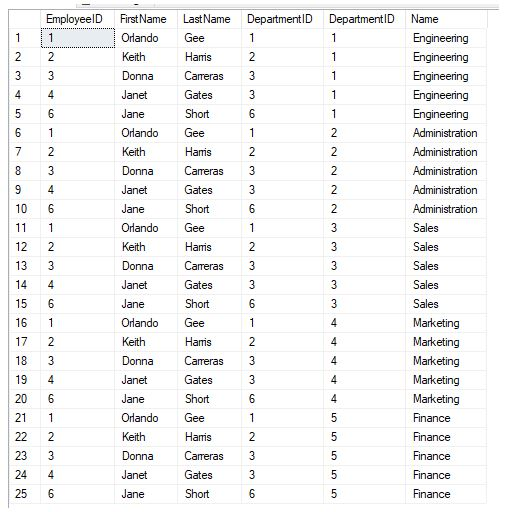

In [17]:

-- every possible combination of everything; cartesian product
SELECT *
FROM Employee E
CROSS JOIN Department D

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/cross_join.jpg', width=600)


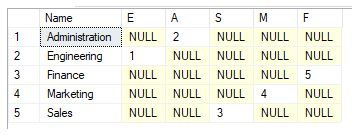

In [21]:

SELECT Name
  ,max(CASE WHEN Name = 'Engineering' Then DepartmentID Else Null End) 'E'
  ,max(CASE WHEN Name = 'Administration' THEN DepartmentID Else Null End) 'A'
  ,max(CASE WHEN Name= 'Sales' Then DepartmentID Else Null End) 'S'
  ,max(CASE WHEN Name = 'Marketing' Then DepartmentID Else Null End) 'M'
  ,max(CASE WHEN Name = 'Finance' Then DepartmentID Else Null End) 'F'
FROM Department
Group By Name

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/case_when_pivot.jpg', width=400)


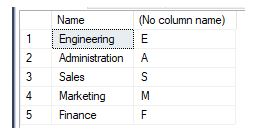

In [22]:

SELECT Name,
  CASE
    WHEN Name = 'Engineering' THEN 'E'
    WHEN Name = 'Administration' THEN 'A'
    WHEN Name = 'Sales' Then 'S'
    WHEN Name = 'Marketing' Then 'M'
    ELSE 'F'
  END
FROM Department;

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/case_when_else.jpg', width=300)


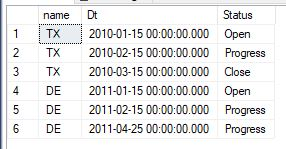

In [30]:

-- A common table expression (CTE) provides the significant advantage of being able to reference itself, 
-- thereby creating a recursive CTE. A recursive CTE is one in which an initial CTE is repeatedly executed 
-- to return subsets of data until the complete result set is obtained.

create table #tmp (name varchar(20),Dt datetime,Status varchar(10))

insert into #tmp select 'TX','2010/01/15','Open'
insert into #tmp select 'TX','2010/02/15','Progress'
insert into #tmp select 'TX','2010/03/15','Close'
insert into #tmp select 'DE','2011/01/15','Open'
insert into #tmp select 'DE','2011/02/15','Progress'
insert into #tmp select 'DE','2011/04/25','Progress'
 
select * from #tmp

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/common_table_expression_all.jpg', width=300)


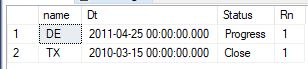

In [31]:

with cte as 
(select *, row_number() over (partition by [name] order by dt DESC) as Rn from #Tmp)
select * from cte where Rn = 1
 
Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/common_table_expression.jpg', width=400)


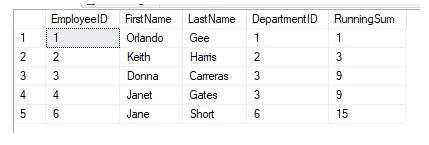

In [33]:

-- Running Sum...it's silly to sum department IDs, but this illustrates the point of how a running sum operates
SELECT [EmployeeID],
      [FirstName],
      [LastName],
      [DepartmentID],
SUM (DepartmentID) OVER (ORDER BY DepartmentID) AS RunningSum
FROM [Employee]

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/running_sum.jpg', width=500)


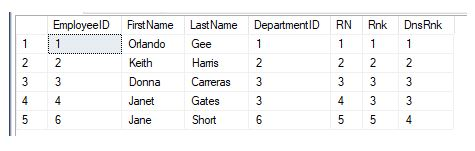

In [34]:

-- Row Number, Rank, and Dense Rank
-- RANK and DENSE_RANK will assign the grades the same rank depending on how they fall compared to the other values. 
-- However, RANK will then skip the next available ranking value whereas DENSE_RANK would still use the next 
-- chronological ranking value. Row_Number will simply number each row in incremental order.

SELECT [EmployeeID],
      [FirstName],
      [LastName],
      [DepartmentID],
Row_Number () OVER (ORDER BY DepartmentID) AS RN,
Rank () OVER (ORDER BY DepartmentID) AS Rnk,
Dense_Rank () OVER (ORDER BY DepartmentID) AS DnsRnk
FROM [Employee

Image(filename='C:/Users/ryans/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/A - GITHUB/SQL/row_number_rank_dense_rank.jpg', width=500)
